### use shell script to count unique id (large file, slow)

In [1]:
import os
cmd="""
export LC_CTYPE=C 
export LANG=C
# get uid field| sort | count unique ids | strip blank spaces | output to file
cat ../data/play/all_play_log| cut -f1 -d$'\t'| sort | uniq -c | sed -e 's/^ *//g;s/ *$//g'> ../data/uid_count.csv
"""
os.system(cmd)

0

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/fanyang/Documents/musicbox/data/uid_count.csv', 
                 sep='\s+', names=['count', 'uid'])

In [14]:
df.head()

,count,uid
0,2,NaN
1,1167848,0.0
2,2,100002491.0
3,56,100052111.0
4,9,100071797.0


In [4]:
df.shape

(594735, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594735 entries, 0 to 594734
Data columns (total 2 columns):
count    594735 non-null int64
uid      594734 non-null float64
dtypes: float64(1), int64(1)
memory usage: 9.1 MB


In [6]:
df.describe()

,count,uid
count,5.947350e+05,5.947340e+05
mean,2.460525e+02,1.673628e+08
std,1.526662e+04,1.047142e+07
min,1.000000e+00,0.000000e+00
25%,9.000000e+00,1.680262e+08
50%,4.000000e+01,1.684782e+08
75%,1.740000e+02,1.687685e+08
max,7.501794e+06,1.692623e+08


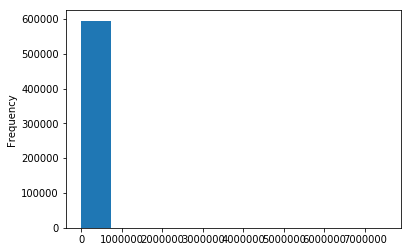

In [8]:
df['count'].plot.hist()

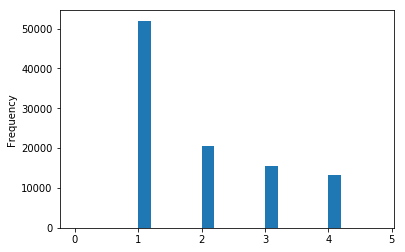

In [9]:
df['count'].plot.hist(bins=np.arange(0,5,0.2))

Text(0.5,0,'user # play (10^n)')

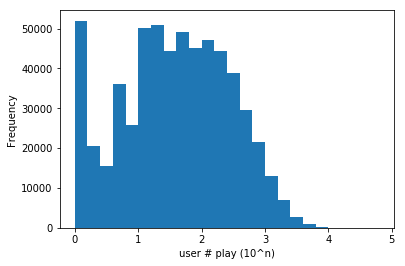

In [12]:
np.log10(df['count']).plot.hist(bins=np.arange(0,5,0.2))
plt.xlabel('user # play (10^n)')

In [13]:
top_count_outlier = np.percentile(df['count'], 99.9)
print(top_count_outlier)

5195.394000000553


In [15]:
print('total number of users: ', len(df['uid']))

total number of users:  594735


In [18]:
id_list_remain = np.array(df['uid'][df['count']<top_count_outlier].dropna())

In [19]:
print('total number of user after romoving top outlier: ', len(id_list_remain))

total number of user after romoving top outlier:  594139


In [20]:
id_list_remain.shape

(594139,)

### downsampling all users on 'uid'

In [21]:
np.random.seed = 1
down_sample_ratio = 0.1
id_subset = set(id_list_remain[
    np.random.random(id_list_remain.shape)<down_sample_ratio
])

In [22]:
print('total number of user after downsample: ', len(id_subset))

total number of user after downsample:  59438


In [23]:
# define date conversion function
import datetime
def convert_date(s):
    s = str(s).strip()
    try:
        year = int(s[:4])
        month = int(s[4:6])
        day = int(s[6:8])
        return datetime.date(year,month,day)
    except:
        return None

### down sampling play record by 'uid'

In [25]:
import csv
input_file = '/Users/fanyang/Documents/musicbox/data/play/all_play_log'
output_file = '/Users/fanyang/Documents/musicbox/data/play_downsample.csv'
input_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
output_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])

#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000
#row processed: 9000000
#row processed: 10000000
#row processed: 11000000
#row processed: 12000000
#row processed: 13000000
#row processed: 14000000
#row processed: 15000000
#row processed: 16000000
#row processed: 17000000
#row processed: 18000000
#row processed: 19000000
#row processed: 20000000
#row processed: 21000000
#row processed: 22000000
#row processed: 23000000
#row processed: 24000000
#row processed: 25000000
#row processed: 26000000
#row processed: 27000000
#row processed: 28000000
#row processed: 29000000
#row processed: 30000000
#row processed: 31000000
#row processed: 32000000
#row processed: 33000000
#row processed: 34000000
#row processed: 35000000
#row processed: 36000000
#row processed: 37000000
#row processed: 38000000
#row processed: 39000000
#row processed: 40000000
#row proc

### down sample download record by 'uid'

In [31]:
import csv
input_file = '/Users/fanyang/Documents/musicbox/data/down/all_down_log'
output_file = '/Users/fanyang/Documents/musicbox/data/download_downsample.csv'
input_field_list = ['uid','device','song_id','song_name','singer','paid_flag','date']
output_field_list = ['uid','device','song_id','song_name','singer','paid_flag','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])

#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000


### down sample search record by 'uid'

In [30]:
 import csv
input_file = '/Users/fanyang/Documents/musicbox/data/search/all_search_log'
output_file = '/Users/fanyang/Documents/musicbox/data/search_downsample.csv'
input_field_list = ['uid','device','time_stamp','search_query','date']
output_field_list = ['uid','device','time_stamp','search_query','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])


#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000


### create file displaying events as searching play/download/search

In [32]:
play_file = '/Users/fanyang/Documents/musicbox/data/play_downsample.csv'
down_file = '/Users/fanyang/Documents/musicbox/data/download_downsample.csv'
search_file = '/Users/fanyang/Documents/musicbox/data/search_downsample.csv'

play_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
down_field_list = ['uid','device','song_id','song_name','singer','paid_flag','date']
search_field_list = ['uid','device','time_stamp','search_query','date']

# save event1 for ['uid','event','song_id','date']
output_file = '/Users/fanyang/Documents/musicbox/data/event1_downsample.csv'
output_field_list = ['uid','event','song_id','date']


with open(play_file,'r') as f_play, open(down_file,'r') as f_down, \
open(search_file,'r') as f_search,open(output_file,'w') as f_out:
    csvplay = csv.DictReader(f_play,delimiter=',')
    csvdown = csv.DictReader(f_down,delimiter=',')
    csvsearch = csv.DictReader(f_search,delimiter=',')
    csvout = csv.writer(f_out,delimiter=',')
    csvout.writerow(output_field_list) # write header
    print('Processing play ...')
    for row in csvplay:
        row['event'] = 'P'
        row['date']
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing down ...')
    for row in csvdown:
        row['event'] = 'D'
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing search ...')
    for row in csvsearch:
        row['event'] = 'S'
        csvout.writerow([row.get(key,'') for key in output_field_list])

Processing play ...
Processing down ...
Processing search ...
